In [5]:
import pandas as pd
import os

In [6]:
pwd

'C:\\Users\\prash'

In [7]:
df_data = pd.read_excel(r'C:\Users\prash\OneDrive\Desktop\DSCI 5340\Project 2\Python.xlsx')

In [8]:
df_data.head()

,y
0,12.200
1,11.026
2,10.225
3,10.312
4,10.280


In [9]:
from statsmodels.tsa.stattools import adfuller

print("p-value:", adfuller(df_data.dropna())[1])

p-value: 0.039191785076647834


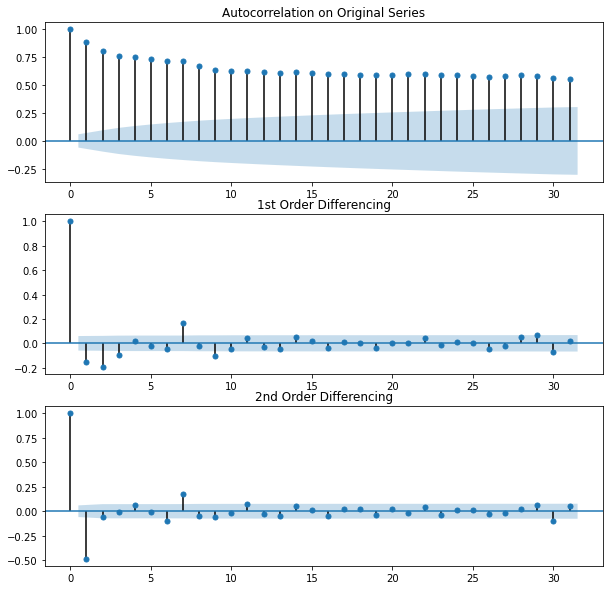

In [10]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(df_data, ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(df_data.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(df_data.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")

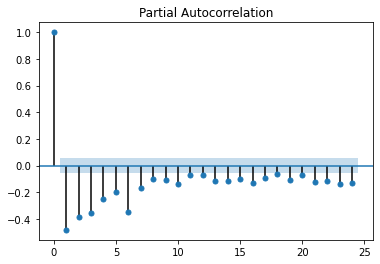

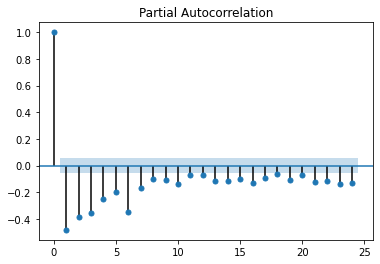

In [11]:
plot_pacf(df_data.diff().diff().dropna(), lags=24)

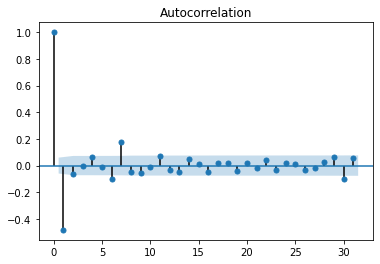

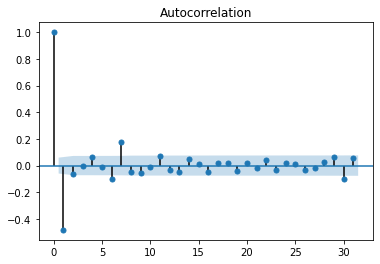

In [12]:
plot_acf(df_data.diff().diff().dropna())

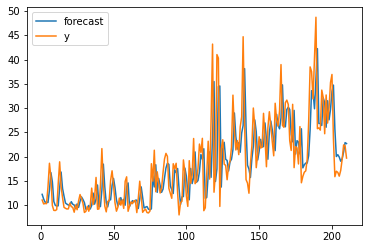

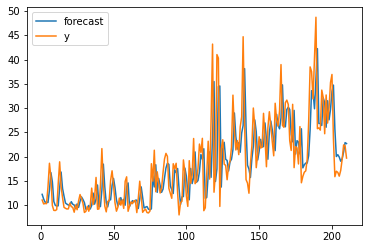

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_data, order=(1, 1, 1))
results = model.fit()
results.plot_predict(1, 210)

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.y    No. Observations:                 1079
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3310.551
Method:                       css-mle   S.D. of innovations              5.202
Date:                Thu, 29 Apr 2021   AIC                           6629.101
Time:                        13:28:01   BIC                           6649.037
Sample:                             1   HQIC                          6636.650
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.039     -0.027      0.979      -0.077       0.075
ar.L1.D.y      0.6028      0.036     16.878      0.000       0.533       0.673
ma.L1.D.y     -0.9033      0.019    -48.081      0.000      -0.940      -0.866
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6590           +0.0000j            1.6590            0.0000
MA.1            1.1070           +0.0000j            1.1070            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
!pip install pmdarima

In [17]:

import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [18]:
arima_model = arimamodel(df_data)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6695.505, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8353.823, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6713.055, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7523.909, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9874.649, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6633.435, Time=1.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6704.334, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=6631.591, Time=1.54 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=6669.874, Time=0.46 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=6630.855, Time=2.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=6647.879, Time=0.54 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=6628.284, Time=2.97 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=6645.307, Time=0.93 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1080
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -3306.142
Date:                Thu, 29 Apr 2021   AIC                           6628.284
Time:                        13:30:14   BIC                           6668.162
Sample:                             0   HQIC                          6643.383
                               - 1080                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0613      0.055      1.110      0.267      -0.047       0.169
ar.L1          1.6338      0.041     39.556      0.000       1.553       1.715
ar.L2         -0.7132      0.049    -14.545      0.000      -0.809      -0.617
ar.L3          0.1041      0.044      2.359      0.018       0.018       0.191
ar.L4          0.0410      0.048      0.854      0.393      -0.053       0.135
ar.L5         -0.0689      0.029     -2.386      0.017      -0.126      -0.012
ma.L1         -0.9122      0.034    -26.707      0.000      -0.979      -0.845
sigma2        26.6482      0.750     35.518      0.000      25.178      28.119
===================================================================================
Ljung-Box (Q):                       81.40   Jarque-Bera (JB):               708.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.24
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 15))
prediction.columns = ['predicted sales']
prediction

,predicted sales
0,10.688061
1,11.002543
2,11.392886
3,11.471090
4,11.531386
5,11.620473
6,11.725482
7,11.816085
8,11.895576
9,11.971259


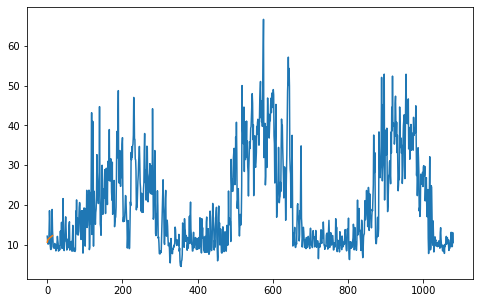

In [24]:
plt.figure(figsize = (8,5))
plt.plot(df_data)
plt.plot(prediction)
plt.show()